# Table of Contents
- [ Detailed panel](#_detailed panel) 
  - [ Weekly incidence curve with typical intensity and thresholds](#_weekly incidence curve with typical intensity and thresholds) 
    - [ Function for incidence plot:](#_function for incidence plot:) 
    - [ State example](#_state example) 
    - [ Regional example](#_regional example) 
    - [  Example with state where estimates are not available:](#_ example with state where estimates are not available:) 
  - [ Obtaining the most probable activity level at selected week](#_obtaining the most probable activity level at selected week) 
  - [ Age distribution](#_age distribution) 
    - [ Function for age distribution plot:](#_function for age distribution plot:) 
  - [ Incidence table information](#_incidence table information) 
- [ Summary panel](#_summary panel) 
  - [ Season level categorization:](#_season level categorization:) 
    - [ Function to calculate seasonal level](#_function to calculate seasonal level) 
    - [ Example applying to a given entry](#_example applying to a given entry) 
    - [ Applying to the whole dataset](#_applying to the whole dataset) 
  - [ Seasonal age distribution](#_seasonal age distribution) 
  - [ Incidence table information](#_incidence table information) 
  - [ Displaying data for user selected week](#_historical data display)


# Detailed panel<a name="_detailed panel"></a>

## Weekly incidence curve with typical intensity and thresholds<a name="_weekly incidence curve with typical intensity and thresholds"></a>

In [1]:
# local
from fludashboard.libs.flu_data import prepare_keys_name

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In this example, we show the current year incidence up to given week.<br>

Along with the current incidence, we present the following intensity thresholds:<br>

* Low activity threshold: estimated epidemic threshold based on historical levels. Minimum: incidence equivalent to 5 cases.

* High activity threshold: incidence considered high based on historical levels. Minimum: incidence equivalent to 10 cases.

* Very high activity threshold: incidence considered very high based on historical levels. Minimum: incidence equivalent to 20 cases.

In [2]:
df_hist = pd.read_csv('../data/historical_estimated_values.csv', encoding='utf-8')
df_inci = pd.read_csv('../data/current_estimated_values.csv', encoding='utf-8')
df_typi = pd.read_csv('../data/mem-typical.csv', encoding='utf-8')
df_thre = pd.read_csv('../data/mem-report.csv', encoding='utf-8')

prepare_keys_name(df_hist)
prepare_keys_name(df_inci)
prepare_keys_name(df_typi)
prepare_keys_name(df_thre)

level_dict = {
    'L0': 'Baixa', 
    'L1': 'Epidêmica',
    'L2': 'Alta', 
    'L3': 'Muito alta'
}

In [3]:
df_inci.columns

Index(['uf', 'epiyear', 'epiweek', 'srag', 'tipo', 'situation', 'mean', '50%',
       '2.5%', '97.5%', 'l0', 'l1', 'l2', 'l3', 'run_date', 'dado', 'escala'],
      dtype='object')

- UF: locality code (includes UFs, Regions and Country)
- Tipo: locality type (Estado, Regional or País)
- mean: estimated mean incidence
- 50%: estimated median
- 2.5%: estimation lower 95% confidence interval
- 97.5%: estimation upper 95% confidence interval
- L0: probability of being below epi. threshold (low level)
- L1: probability of being above epi. threshold and below high activity (epidemic level)
- L2: prob. of being above high activity and below very high (high level)
- L3: prob. of being above very high activity threshold (very high level)
- Situation:
    - stable: might suffer minor changes in the future. Reliable as is;
    - estimated: data estimated based on opportunity (i.e. notification delay) profile. Reliable within confidence interval;
    - unknown: might suffer significant changes in the coming weeks. This is the case for locations where estimation is not possible and data is still "fresh". Unreliable.

In [4]:
df_inci.head(5)

,uf,epiyear,epiweek,srag,tipo,situation,mean,50%,2.5%,97.5%,l0,l1,l2,l3,run_date,dado,escala
0,11,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017-10-11,srag,incidência
1,11,2009,2,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017-10-11,srag,incidência
2,11,2009,3,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017-10-11,srag,incidência
3,11,2009,4,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017-10-11,srag,incidência
4,11,2009,5,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2017-10-11,srag,incidência


In [5]:
df_typi.head(5)

,uf,populacao,epiweek,corredor_baixo,corredor_mediano,corredor_alto,ano,unidade_da_federacao,tipo,dado,escala
0,11,1805788,1,0.0,0.013703,0.041109,2017,Rondônia,Estado,srag,incidência
1,11,1805788,2,0.0,0.000000,0.000000,2017,Rondônia,Estado,srag,incidência
2,11,1805788,3,0.0,0.075776,0.241352,2017,Rondônia,Estado,srag,incidência
3,11,1805788,4,0.0,0.027742,0.060064,2017,Rondônia,Estado,srag,incidência
4,11,1805788,5,0.0,0.056723,0.124858,2017,Rondônia,Estado,srag,incidência


In [6]:
df_thre.tail(5)

,uf,populacao,media_geometrica_do_pico_de_infeccao_das_temporadas_regulares,regiao_de_baixa_atividade_tipica,limiar_pre_epidemico,intensidade_alta,intensidade_muito_alta,se_tipica_do_inicio_do_surto,"se_tipica_do_inicio_do_surto___ic_inferior_(2,5%)","se_tipica_do_inicio_do_surto___ic_superior_(97,5%)",duracao_tipica_do_surto,"duracao_tipica_do_surto___ic_inferior_(2,5%)","duracao_tipica_do_surto___ic_superior_(97,5%)",ano,unidade_da_federacao,tipo,dado,escala
187,BR,207660929,25.792793,0,8.389739,49.815497,96.311243,16.0,5.0,21.0,12.0,11.0,15.0,2017,Brasil,País,obitoflu,casos
188,RegC,27644815,3.946975,1,0.500000,4.402850,5.445506,NaN,NaN,NaN,NaN,NaN,NaN,2017,Regional Centro,Regional,obitoflu,casos
189,RegL,67770757,2.701016,0,1.257426,3.573874,4.528359,16.0,8.0,30.0,8.0,3.0,17.0,2017,Regional Leste,Regional,obitoflu,casos
190,RegN,16386007,4.121369,0,1.182767,5.704745,7.114658,12.0,2.0,16.0,8.0,1.0,11.0,2017,Regional Norte,Regional,obitoflu,casos
191,RegS,95859350,6.454024,0,8.889376,11.831033,16.324451,25.0,17.0,33.0,10.0,7.0,14.0,2017,Regional Sul,Regional,obitoflu,casos


Entries with dfthresholds['se típica do inicio do surto'] = NaN have activity too low for proper epidemic threshold definition

In [18]:
k = ['epiyear', 'epiweek', 'base_epiyear', 'base_epiweek']
df_inci2017 = df_inci[
    (df_inci.epiyear == 2017) &
    # (df_inci.epiweek >= 15) &
    (df_inci.dado == 'srag') &
    (df_inci.escala == 'incidência') & 
    (df_inci.uf == 'BR')
].copy()

df_inci2017.sort_values(['epiyear', 'epiweek'], inplace=True)
df_inci_chart = df_inci2017.copy()
df_inci_chart.index = df_inci_chart.epiweek

In [19]:
k = ['epiyear', 'epiweek', 'base_epiyear', 'base_epiweek']
df_hist2017 = df_hist[
    (df_hist.base_epiyear == 2017) &
    (df_hist.base_epiweek == 23) &
    (df_hist.dado == 'srag') &
    (df_hist.escala == 'incidência') & 
    (df_hist.uf == 'BR')
].copy()

df_hist2017.sort_values(['epiyear', 'epiweek'], inplace=True)

df_hist_chart = df_hist2017.copy()
df_hist_chart.index = df_hist_chart.epiweek

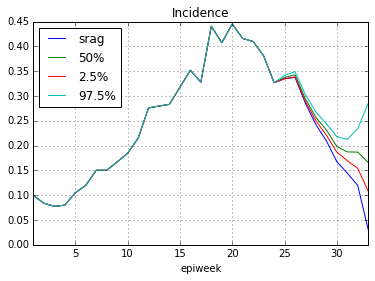

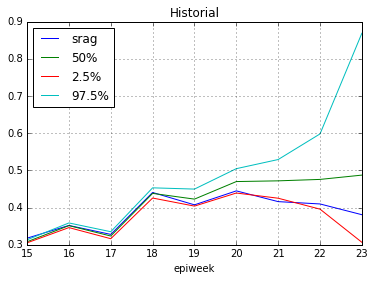

In [20]:
# 50% estimated cases

df_inci_chart[['srag', '50%', '2.5%', '97.5%']].plot()
plt.title('Incidence')
plt.grid(True)
plt.show()

df_hist_chart[['srag', '50%', '2.5%', '97.5%']].plot()
plt.title('Historial')
plt.grid(True)

plt.show()

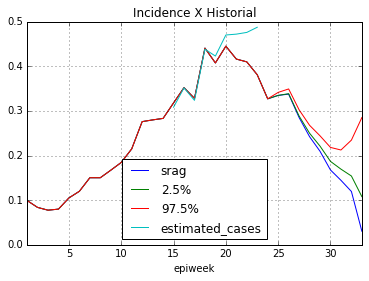

In [21]:
df_hist2017['estimated_cases'] = df_hist2017['50%']

df = pd.merge(
    df_inci2017[['epiweek', 'srag', '2.5%', '97.5%']], 
    df_hist2017[['epiweek', 'estimated_cases']], 
    on='epiweek', how='outer'
)

df.set_index('epiweek', inplace=True)

df.plot()
plt.grid(True)
plt.title('Incidence X Historial')
plt.show()

## Displaying data for user selected week w<a name="_historical data display"></a>

For each week w selected by the user, the notification curve will always be that which is found on df_inci, while the estimates will be that stored in df_hist. Data df_inci only has the most recent estimates, which are based on the most recent week with data. The estimates obtained at each week is stored at df_hist.

So, first of all, we will slice the historical data to week w, and limit current data to week <= w.
If w=23, the historical dataset is already correctly sliced in df_hist2017, so we just have to limit the current for the proper plot:

In [22]:
df_hist[
        (df_hist.base_epiyear == 2017) &
        (df_hist.dado == 'srag') &
        (df_hist.escala == 'incidência') & 
        (df_hist.uf == 'BR')
        ].base_epiweek.unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 33])

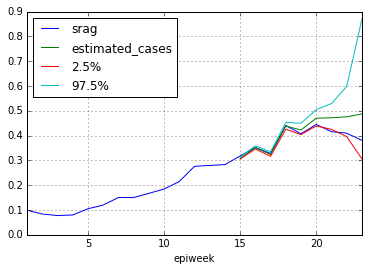

In [23]:
# First, last keep only stable weeksfor notification curve:
df_inci2017.loc[(df_inci2017.situation != 'stable'), 'srag'] = np.nan

# Adapt historical dataset:
df_hist.sort_values(['epiyear', 'epiweek'], inplace=True)
df_hist['estimated_cases'] = df_hist['50%']

# User selected week:
y = 2017
w = 23

def week_data(y, w):
    df_week_inci = df_inci2017[(df_inci2017.epiweek <= w)]

    df_week_hist = df_hist[
        (df_hist.base_epiyear == y) &
        (df_hist.base_epiweek == w) &
        (df_hist.dado == 'srag') &
        (df_hist.escala == 'incidência') & 
        (df_hist.uf == 'BR')
    ].copy()

    df = pd.merge(
        df_week_inci[['epiweek', 'srag']], 
        df_week_hist[['epiweek', 'estimated_cases', '2.5%', '97.5%']], 
        on='epiweek', how='outer'
    )

    df.set_index('epiweek', inplace=True)
    return df

df = week_data(y, w)
df.plot()
plt.grid(True)
plt.show()



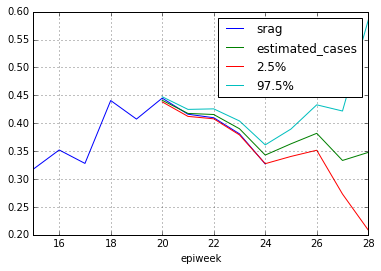

In [13]:
w = 28
df = week_data(y, w)
df.plot()
plt.grid(True)
plt.show()

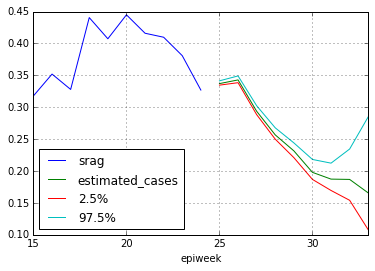

In [14]:
w = 33
df = week_data(y, w)
df.plot()
plt.grid(True)
plt.show()